In [8]:
import pandas as pd
con = pd.read_csv('content.csv')
con.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [9]:
con.isnull().sum()

Content ID      0
Content Type    0
Category        0
dtype: int64

In [10]:
import pandas as pd
reac = pd.read_csv('Reactions.csv')
reac.head()

,Content ID,Reaction Type,Datetime
0,NaN,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07-11-2020 09:43
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17-06-2021 12:22
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18-04-2021 05:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06-01-2021 19:13


In [15]:
react = reac.dropna()
react.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07-11-2020 09:43
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17-06-2021 12:22
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18-04-2021 05:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06-01-2021 19:13
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23-08-2020 12:25


In [16]:
react.isnull().sum()

Content ID       0
Reaction Type    0
Datetime         0
dtype: int64

In [20]:
react.to_csv('newreaction.csv')

In [23]:
import pandas as pd
reacty = pd.read_csv('ReactionTypes.csv')
reacty.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [24]:
reacty.isnull().sum()

Reaction Type    0
Sentiment        0
Score            0
dtype: int64

In [25]:
import pandas as pd

# Assuming you have three DataFrames: reaction_df, content_df, and reaction_types_df

# Merge the DataFrames
merged_df = react.merge(con, how='left', on='Content ID').merge(reacty, how='left', on='Reaction Type')
merged_df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07-11-2020 09:43,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17-06-2021 12:22,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18-04-2021 05:13,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06-01-2021 19:13,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23-08-2020 12:25,photo,Studying,positive,30


In [26]:
merged_df.sample(10)

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
22583,56d13215-1444-49b0-8e17-3a888bcd4e1e,hate,22-12-2020 21:45,GIF,fitness,negative,5
12899,0ce7392d-5c20-4ffa-a42f-767f51e9b466,disgust,30-12-2020 19:04,GIF,travel,negative,0
17954,c582f515-4d90-4ae6-9ab7-059fdbd7956c,cherish,14-04-2021 02:48,audio,technology,positive,70
12737,19f998c4-270b-489d-bea6-ae161d301923,adore,28-01-2021 15:53,GIF,travel,positive,72
6489,19179d57-4950-4a98-87fa-98f824551a6f,disgust,27-07-2020 17:35,photo,education,negative,0
11170,a82b8250-08aa-47a5-97c4-19f30f236179,super love,24-12-2020 11:16,audio,culture,positive,75
1232,14ed7f7b-2c96-4458-8a39-606c25c14180,disgust,24-02-2021 03:44,video,tennis,negative,0
2930,8e3896e3-2f84-4b47-9365-fb562c9ed730,hate,01-02-2021 23:31,video,public speaking,negative,5
16417,2f5dd79a-8884-4086-ab6f-00b3bea9d366,disgust,10-02-2021 00:53,photo,cooking,negative,0
2564,c8b044a9-8427-4b41-bc61-7b549ab1626c,worried,17-10-2020 15:31,photo,studying,negative,12


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [34]:
# Calculate the total scores for each category
category_scores = merged_df.groupby('Category')['Score'].sum().reset_index()
category_scores.head(20)

,Category,Score
0,Animals,3723
1,Culture,1627
2,Education,1395
3,Fitness,5488
4,Food,3504
5,Healthy Eating,272
6,Public Speaking,1336
7,Science,4619
8,Soccer,2631
9,Studying,1341


In [35]:
# Find the top 5 performing categories
top_categories = category_scores.nlargest(5, 'Score')
top_categories.head(10)

,Category,Score
13,animals,71242
20,healthy eating,69067
25,technology,68521
22,science,66549
15,culture,64952


In [33]:
merged_df.to_csv('combined.csv')

In [36]:
top_categories.to_csv('top_categories.csv')


In [38]:
newdf = pd.read_csv("Task 3_Final Content Data set.csv")
newdf.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [50]:
newdf['Datetime'] = pd.to_datetime(newdf['Datetime'], dayfirst=True)

C:\Users\tusha\AppData\Local\Temp\ipykernel_12196\3921497857.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [51]:
newdf['Year'] = newdf['Datetime'].dt.year
newdf.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Year
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:00,photo,studying,negative,0,2020
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,2021
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,2021
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:00,photo,studying,negative,0,2021
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,2020


In [ ]:
from datetime import datetime
import calendar

newdf['Month'] = newdf['Datetime'].dt.month
newdf['Month'] = newdf['Month'].apply(lambda x: calendar.month_name[x])

newdf['Date'] = newdf['Datetime'].dt.day
newdf['Day_of_Week'] = newdf['Datetime'].dt.day_name()
# Define a function to get part of the day
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract part of the day based on the hour
newdf['Part_of_Day'] = newdf['Datetime'].dt.hour.apply(get_part_of_day)
newdf.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Year,Month,Date,Day_of_Week,Part_of_Day
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:00,photo,studying,negative,0,2020,November,7,Saturday,Morning
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,2021,June,17,Thursday,Afternoon
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,2021,April,18,Sunday,Morning
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:00,photo,studying,negative,0,2021,January,6,Wednesday,Evening
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,2020,August,23,Sunday,Afternoon


2024-04-18 03:03:22,361 - INFO     - Executing shutdown due to inactivity...
2024-04-18 03:03:26,429 - INFO     - Executing shutdown...
2024-04-18 03:03:26,432 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [55]:
newdf.to_csv('top3content.csv')


<Axes: xlabel='Content Type', ylabel='Reaction Type'>

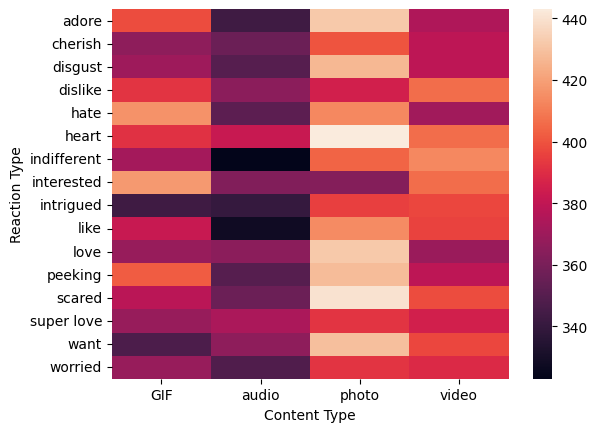

In [62]:
import seaborn as sns
sns.heatmap(pd.crosstab(newdf['Reaction Type'], newdf['Content Type']))

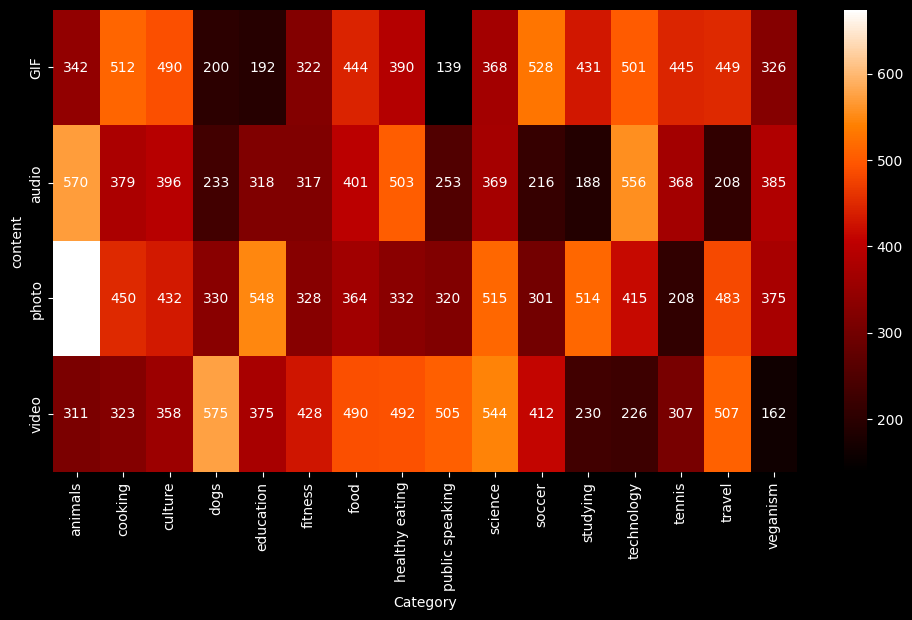

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

# Create the crosstab
ct = pd.crosstab(newdf['Content Type'], newdf['Category'])

# Plot the heatmap
sns.heatmap(ct, cmap='gist_heat', annot=True, fmt='d', annot_kws={'color': 'white'})

# Add labels
plt.xlabel('Category')
plt.ylabel('content')

# Display the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

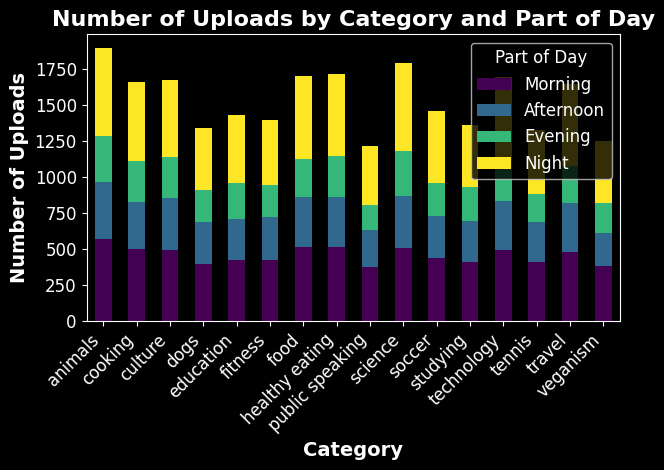

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the count of uploads for each category and part of the day
upload_counts = newdf.groupby(['Category', 'Part_of_Day']).size().unstack(fill_value=0)

# Reorder the columns based on the Part_of_Day order
part_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
upload_counts = upload_counts[part_of_day_order]

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
upload_counts.plot(kind='bar', stacked=True, cmap='viridis')

# Customize the plot
plt.xlabel('Category', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Number of Uploads', fontsize=14, fontweight='bold', color='white')
plt.title('Number of Uploads by Category and Part of Day', fontsize=16, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add a legend
plt.legend(title='Part of Day', fontsize=12, title_fontsize=12, loc='upper right', bbox_to_anchor=(1, 1), labels=part_of_day_order)

plt.tight_layout()
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_12196\2851308047.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




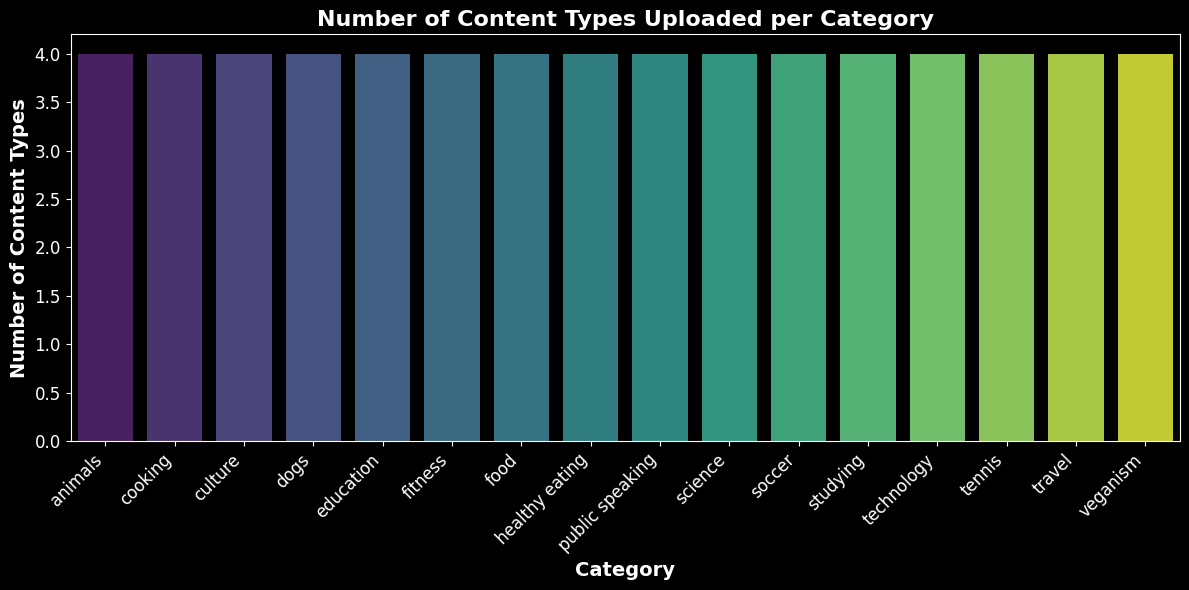

In [86]:
# Get the counts of each content type per category
content_type_counts = newdf.groupby('Category')['Content Type'].nunique()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')

# Customize the plot
plt.xlabel('Category', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Number of Content Types', fontsize=14, fontweight='bold', color='white')
plt.title('Number of Content Types Uploaded per Category', fontsize=16, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.tight_layout()
plt.show()


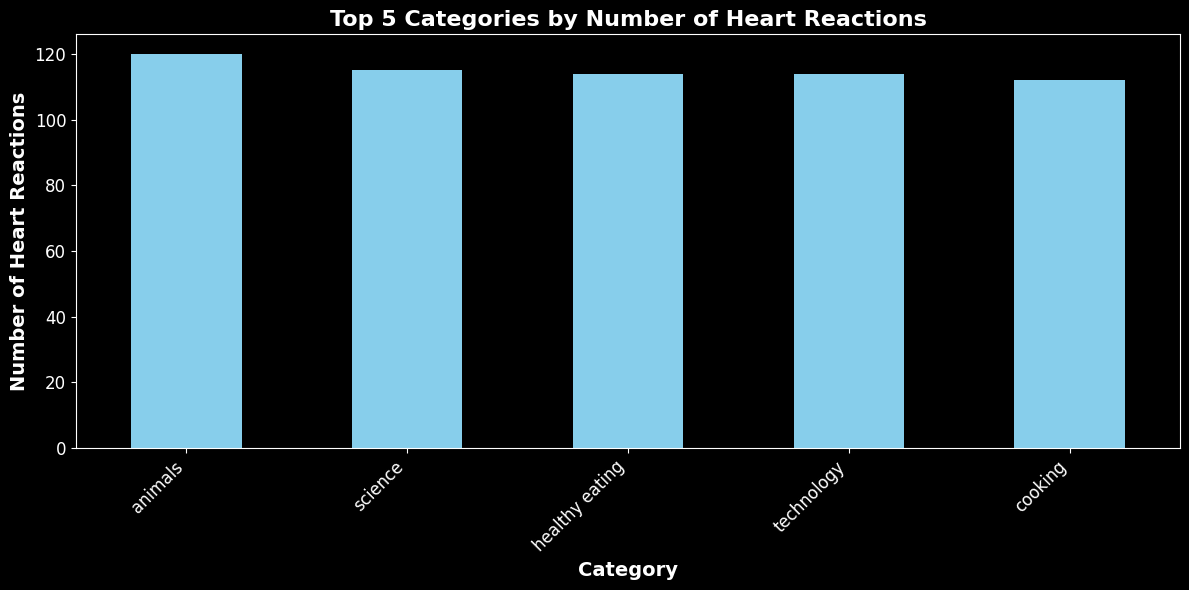

In [90]:
# Filter the DataFrame to include only rows where the Reaction Type is 'Heart'
heart_reactions_df = newdf[newdf['Reaction Type'] == 'heart']

# Get the top 5 categories with the most 'Heart' reactions
top_categories = heart_reactions_df['Category'].value_counts().head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')

# Customize the plot
plt.xlabel('Category', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Number of Heart Reactions', fontsize=14, fontweight='bold', color='white')
plt.title('Top 5 Categories by Number of Heart Reactions', fontsize=16, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.tight_layout()
plt.show()


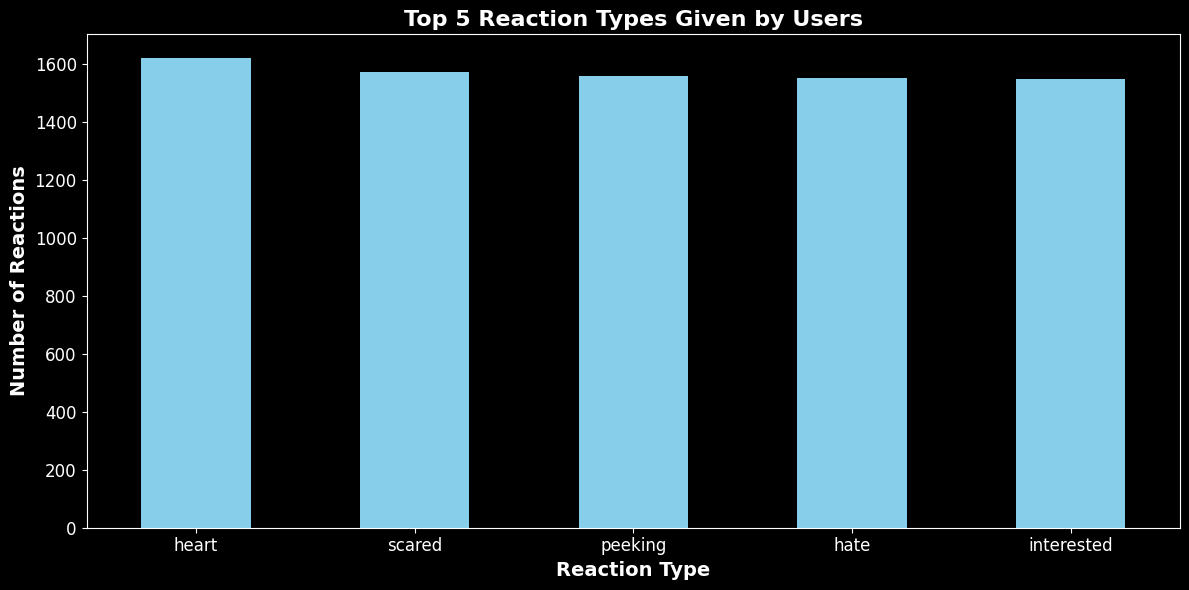

In [91]:
# Get the top 5 reaction types given by users
top_reaction_types = newdf['Reaction Type'].value_counts().head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_reaction_types.plot(kind='bar', color='skyblue')

# Customize the plot
plt.xlabel('Reaction Type', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Number of Reactions', fontsize=14, fontweight='bold', color='white')
plt.title('Top 5 Reaction Types Given by Users', fontsize=16, fontweight='bold', color='white')
plt.xticks(rotation=0, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.tight_layout()
plt.show()


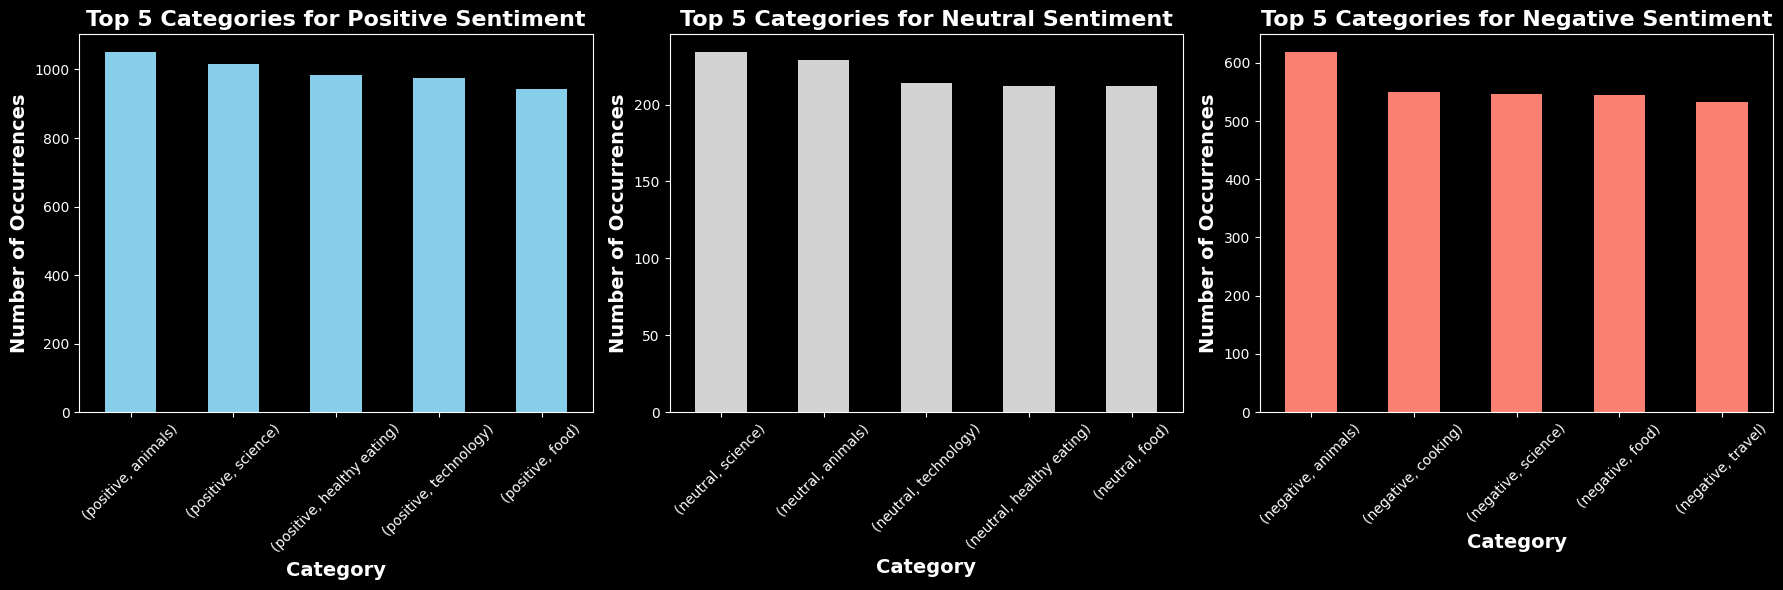

In [96]:
# Filter the DataFrame to include only rows where the sentiment is 'positive', 'negative', or 'neutral'
sentiment_df = newdf[newdf['Sentiment'].isin(['positive', 'negative', 'neutral'])]

# Get the top 5 categories for each sentiment
top_categories = sentiment_df.groupby('Sentiment')['Category'].value_counts().groupby(level=0).nlargest(5)

# Create subplots for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sentiments = ['positive', 'neutral', 'negative']
colors = ['skyblue', 'lightgrey', 'salmon']

for i, sentiment in enumerate(sentiments):
    top_categories[sentiment].plot(kind='bar', ax=axes[i], color=colors[i])
    axes[i].set_title(f'Top 5 Categories for {sentiment.capitalize()} Sentiment', fontsize=16, fontweight='bold', color='white')
    axes[i].set_xlabel('Category', fontsize=14, fontweight='bold', color='white')
    axes[i].set_ylabel('Number of Occurrences', fontsize=14, fontweight='bold', color='white')
    axes[i].tick_params(axis='x', rotation=45, labelcolor='white')
    axes[i].tick_params(axis='y', labelcolor='white')

plt.tight_layout()
plt.show()


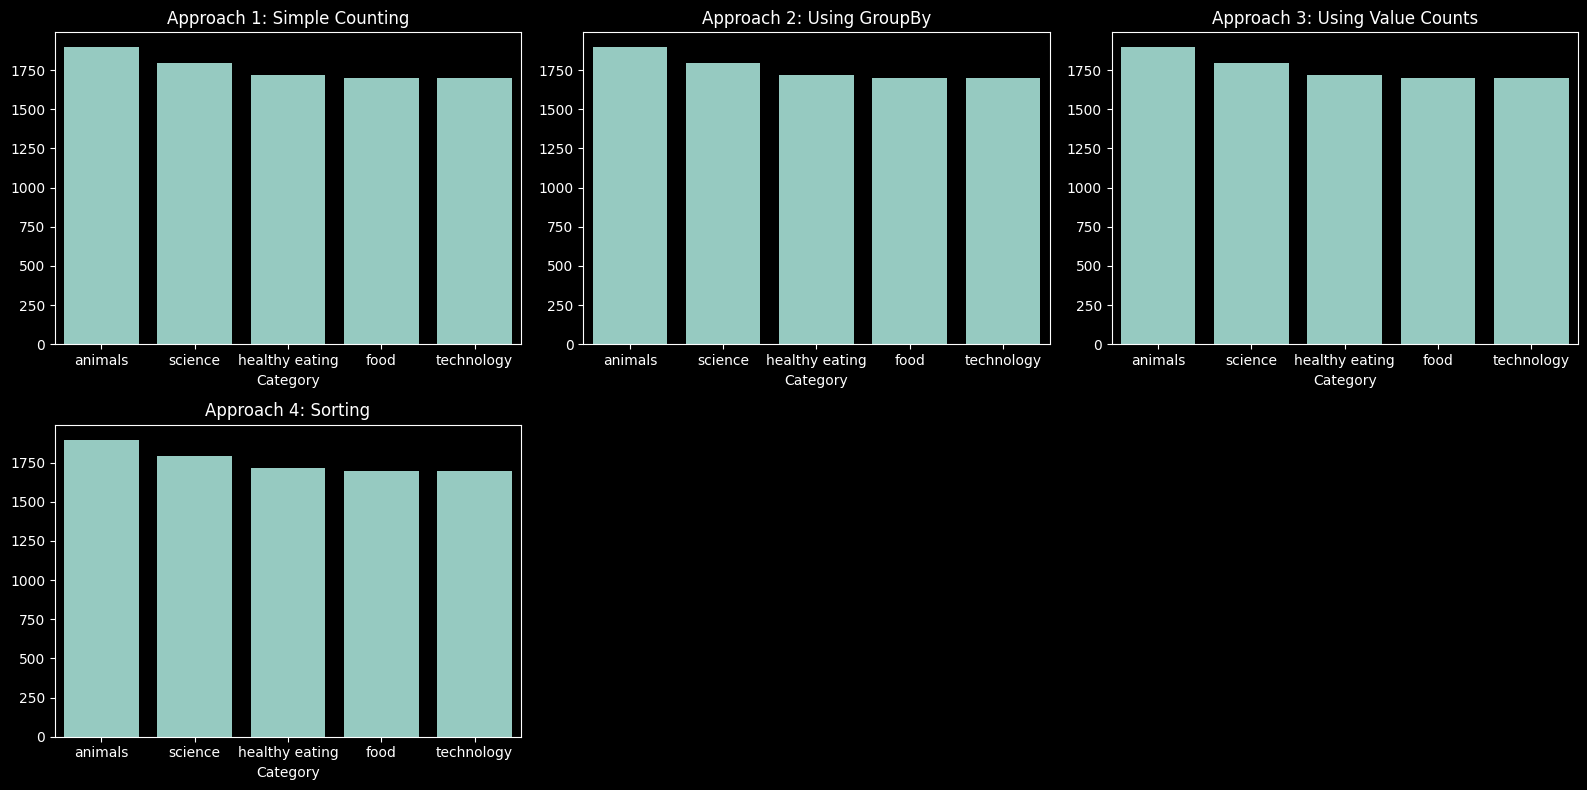

In [97]:
# Approach 1: Simple Counting
top_categories_1 = newdf['Category'].value_counts().head(5)

# Approach 2: Using GroupBy
top_categories_2 = newdf.groupby('Category').size().nlargest(5)

# Approach 3: Using Value Counts
top_categories_3 = newdf['Category'].value_counts().nlargest(5)

# Approach 4: Sorting
top_categories_4 = newdf['Category'].value_counts().sort_values(ascending=False).head(5)

# Approach 5: Using SQL (not applicable in this example)

# Visualizing the results
plt.figure(figsize=(16, 8))

plt.subplot(231)
sns.barplot(x=top_categories_1.index, y=top_categories_1.values)
plt.title('Approach 1: Simple Counting')

plt.subplot(232)
sns.barplot(x=top_categories_2.index, y=top_categories_2.values)
plt.title('Approach 2: Using GroupBy')

plt.subplot(233)
sns.barplot(x=top_categories_3.index, y=top_categories_3.values)
plt.title('Approach 3: Using Value Counts')

plt.subplot(234)
sns.barplot(x=top_categories_4.index, y=top_categories_4.values)
plt.title('Approach 4: Sorting')

plt.tight_layout()
plt.show()

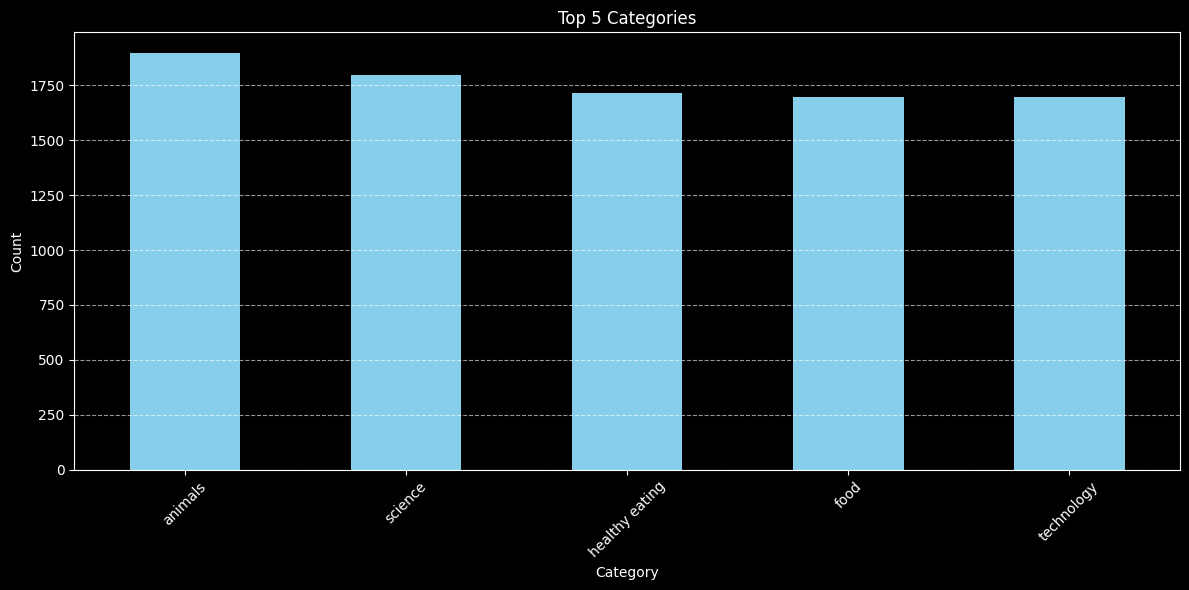

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called df
# You can read your dataset like this:
# df = pd.read_csv('your_dataset.csv')

# Group the data by the 'Category' column and count the occurrences
category_counts = newdf['Category'].value_counts()

# Get the top 5 categories
top_categories = category_counts.head(5)

# Plotting
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [70]:

# Assuming 'Category' is the column containing the categories of posts
# Assuming 'Reaction' is the column containing the reactions

# Get the counts of each category
category_counts = newdf['Category'].value_counts()

# Find the most popular category (category with the highest count)
most_popular_category = category_counts.idxmax()

# Get the count of reactions for the most popular category
reactions_to_most_popular_category = len(newdf[newdf['Category'] == most_popular_category])

print(f"The most popular category is '{most_popular_category}' with {reactions_to_most_popular_category} reactions.")



The most popular category is 'animals' with 1897 reactions.


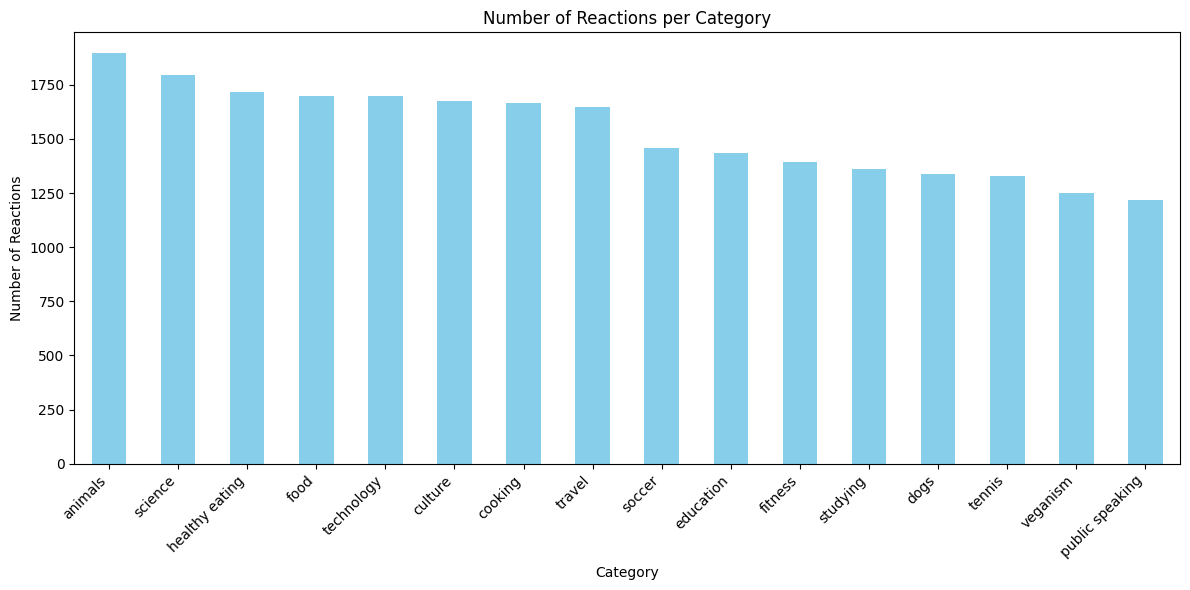

In [71]:
import matplotlib.pyplot as plt

# Get the counts of each category
category_counts = newdf['Category'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.title('Number of Reactions per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_12196\2607913679.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




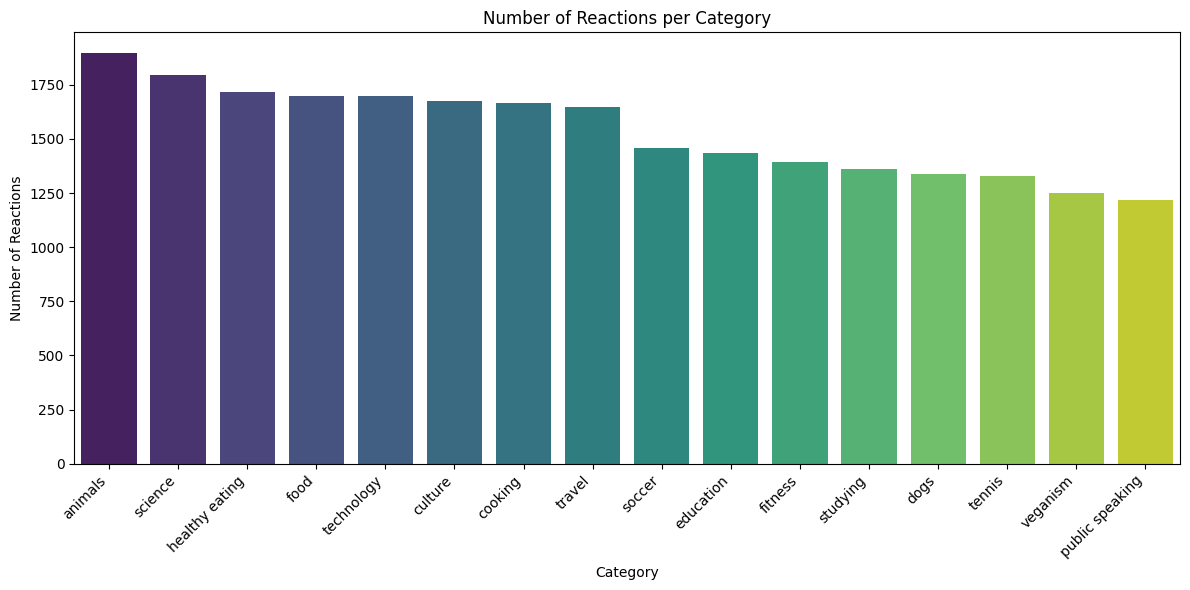

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each category
category_counts = newdf['Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.title('Number of Reactions per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_12196\2220291284.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




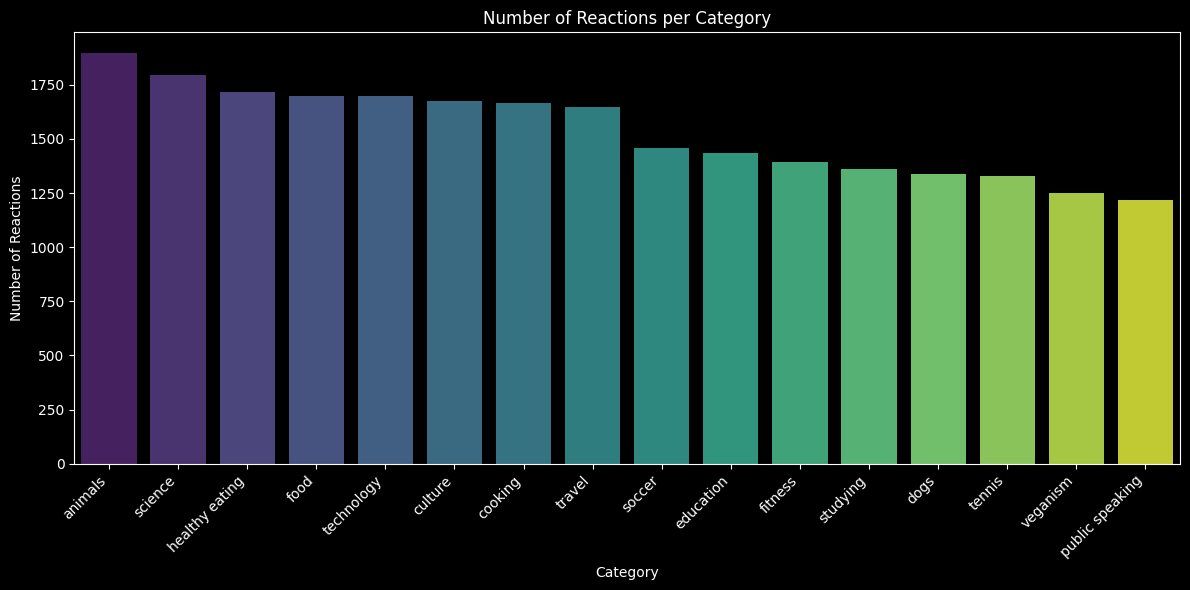

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to dark
plt.style.use('dark_background')

# Get the counts of each category
category_counts = newdf['Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.title('Number of Reactions per Category')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_12196\3322267026.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




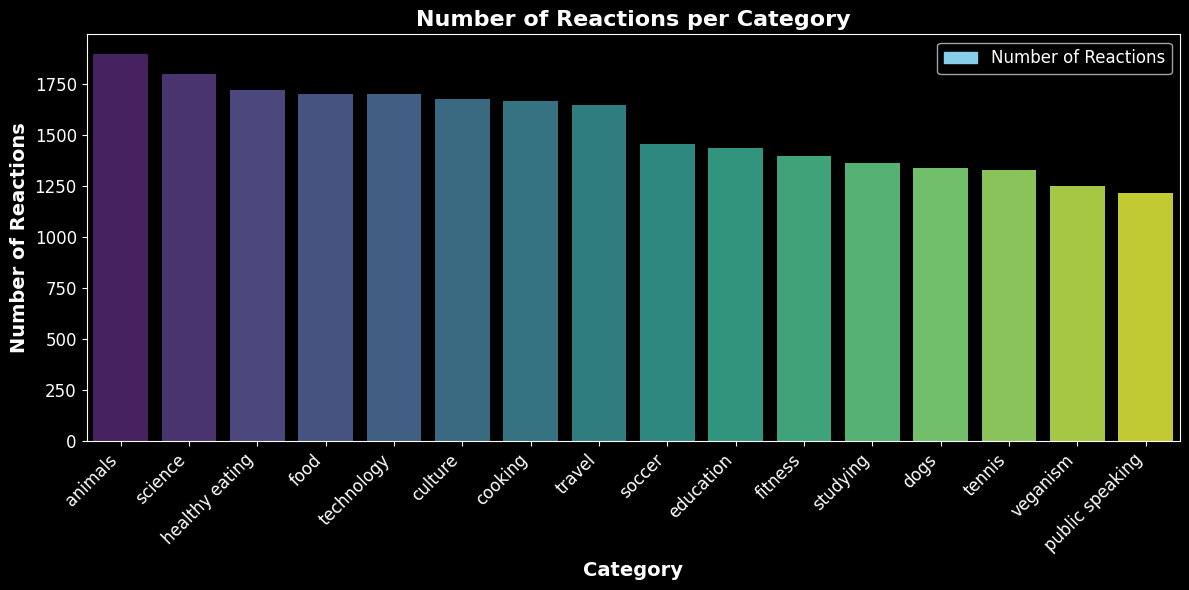

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set the style to dark
plt.style.use('dark_background')

# Get the counts of each category
category_counts = newdf['Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Customize the plot
plt.xlabel('Category', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Number of Reactions', fontsize=14, fontweight='bold', color='white')
plt.title('Number of Reactions per Category', fontsize=16, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add a legend
legend_patch = mpatches.Patch(color='skyblue', label='Number of Reactions')
plt.legend(handles=[legend_patch], loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_12196\3819530717.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




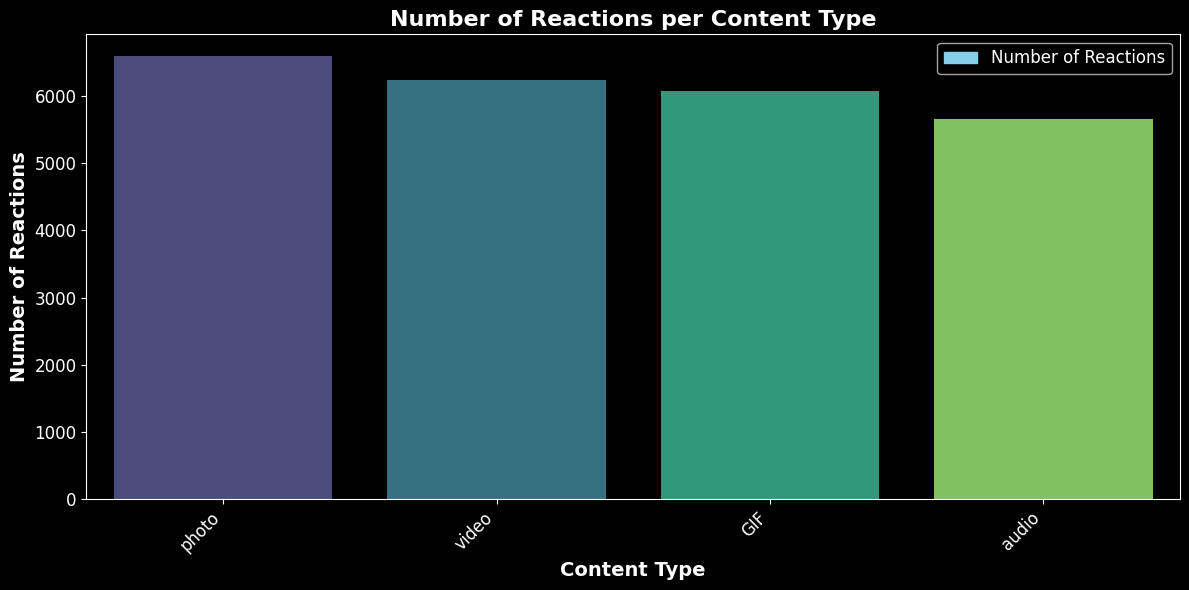

In [75]:
# Get the counts of each content type
content_type_counts = newdf['Content Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')

# Customize the plot
plt.xlabel('Content Type', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Number of Reactions', fontsize=14, fontweight='bold', color='white')
plt.title('Number of Reactions per Content Type', fontsize=16, fontweight='bold', color='white')
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add a legend
legend_patch = mpatches.Patch(color='skyblue', label='Number of Reactions')
plt.legend(handles=[legend_patch], loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


In [100]:
# Group the data by 'Content Type' and 'Category' columns and count the occurrences
category_counts = newdf.groupby(['Content Type', 'Category']).size().reset_index(name='Count')

# Sort the data by 'Content Type' and 'Count' columns
sorted_categories = category_counts.sort_values(by=['Content Type', 'Count'], ascending=[True, False])

# Get the top 5 categories for each content type
top_categories = sorted_categories.groupby('Content Type').head(5)

print(top_categories)

   Content Type         Category  Count
10          GIF           soccer    528
1           GIF          cooking    512
12          GIF       technology    501
2           GIF          culture    490
14          GIF           travel    449
16        audio          animals    570
28        audio       technology    556
23        audio   healthy eating    503
22        audio             food    401
18        audio          culture    396
32        photo          animals    674
36        photo        education    548
41        photo          science    515
43        photo         studying    514
46        photo           travel    483
51        video             dogs    575
57        video          science    544
62        video           travel    507
56        video  public speaking    505
55        video   healthy eating    492


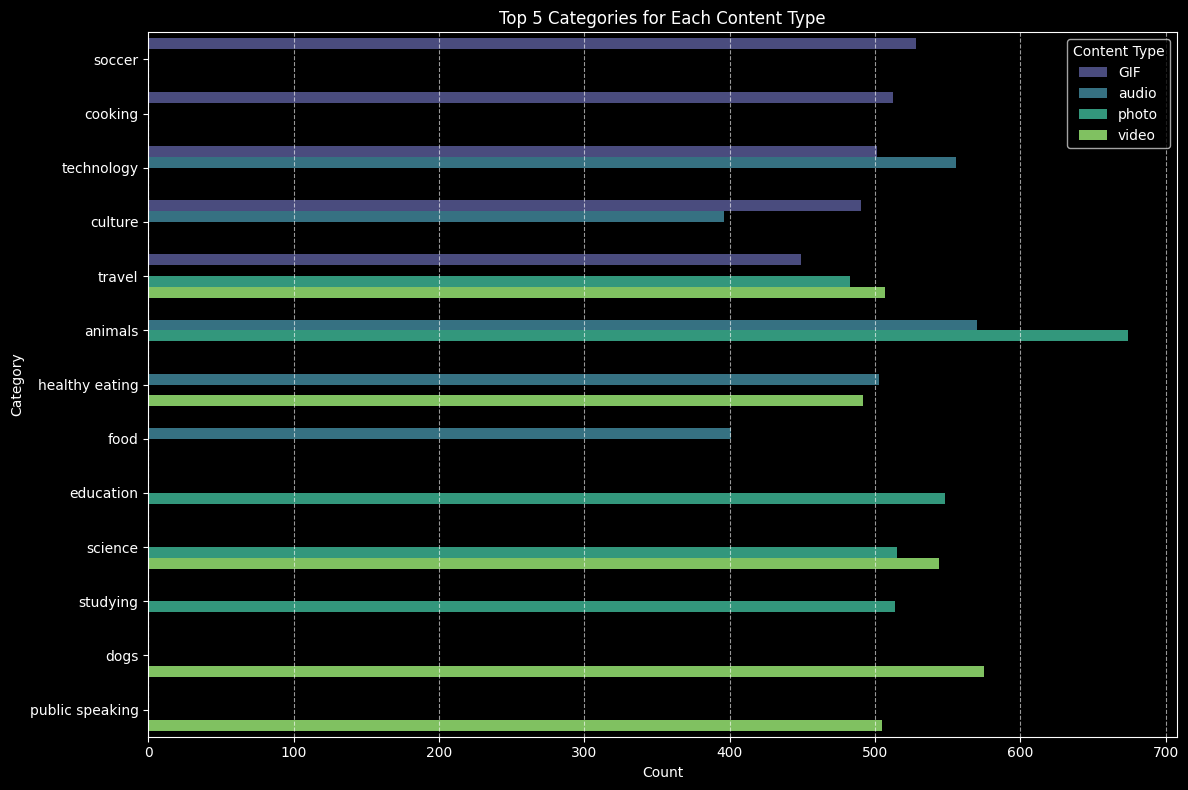

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable called df
# You can read your dataset like this:
# df = pd.read_csv('your_dataset.csv')

# Group the data by 'Content Type' and 'Category' columns and count the occurrences
category_counts = newdf.groupby(['Content Type', 'Category']).size().reset_index(name='Count')

# Sort the data by 'Content Type' and 'Count' columns
sorted_categories = category_counts.sort_values(by=['Content Type', 'Count'], ascending=[True, False])

# Get the top 5 categories for each content type
top_categories = sorted_categories.groupby('Content Type').head(5)

# Create a bar plot for each content type
plt.figure(figsize=(12, 8))
sns.barplot(data=top_categories, x='Count', y='Category', hue='Content Type', palette='viridis')
plt.title('Top 5 Categories for Each Content Type')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [102]:
import pandas as pd

# Assuming your dataset is stored in a variable called df
# You can read your dataset like this:
# df = pd.read_csv('your_dataset.csv')

# Filter the dataset for rows where Reaction Type is 'love'
love_reactions = newdf[newdf['Reaction Type'] == 'love']

# Group the filtered data by the 'Category' column and count the occurrences
category_counts = love_reactions['Category'].value_counts()

# Get the top 5 categories
top_categories = category_counts.head(5)

print(top_categories)


Category
food         123
science      119
animals      119
culture      108
education    105
Name: count, dtype: int64


In [42]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [40]:
# Calculate the total scores for each category
category_scores = newdf.groupby('Category')['Score'].sum().reset_index()
category_scores.head(20)

,Category,Score
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436
5,fitness,55323
6,food,66676
7,healthy eating,69339
8,public speaking,49264
9,science,71168


In [41]:
# Find the top 5 performing categories
top_categories = category_scores.nlargest(5, 'Score')
top_categories.head(10)

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


In [46]:
import pandas as pd

# Assuming 'df' is your DataFrame
num_unique_categories = newdf['Category'].nunique()
print("Number of unique categories:", num_unique_categories)


Number of unique categories: 16


In [47]:
!pip install dtale

     ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
     ------------- -------------------------- 20.5/62.3 kB ? eta -:--:--
     ---------------------------------------- 62.3/62.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/642.7 kB ? eta -:--:--
     ---- ---------------------------------- 71.7/642.7 kB 3.8 MB/s eta 0:00:01
     ---------------- --------------------- 286.7/642.7 kB 2.9 MB/s eta 0:00:01
     ------------------------------------ - 614.4/642.7 kB 4.8 MB/s eta 0:00:01
     -------------------------------------- 642.7/642.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached matplotlib-3.7.2-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached networkx-3.1-py3

In [48]:
import dtale

In [49]:
dtale.show(newdf)

2024-04-18 02:03:12,601 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\tusha\anaconda3\envs\python8\lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\tusha\anaconda3\envs\python8\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\tusha\anaconda3\envs\python8\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\tusha\anaconda3\envs\python8\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\tusha\anaconda3\envs\python8\lib\site-packages\dash\dash.py", line 1352, in dispatch
    ctx.run(
  File "c:\Users\tusha\anaconda3\envs\python8\lib\site-packages\dash\_callback.py", line 450, in add_context
    output_v